Question 1)

Using the dataset gas.csv:

    1 - View its first 5 lines and show the names of its columns.
    2 - Obtain the minimum and maximum values of gas emission considering all the period of observation.
    3 - Create a new column in the DataFrame which cointains only the year (as int) from column DATE.
    4 - Group the values from the DataFrame in order to obtain the year which had in average, the highest emission of gases.
    5 - Plot a bar chart which shows the average emission of gases during the years 1980 through 2019.
    

In [ ]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
#Item 1) View its first 5 lines and show its columns.

df=pd.read_csv("gas.csv")

print("5 first lines of the DataFrame:")
display(df.head(5))

print("Columns of the Dataframe:")
print(df.columns[0],df.columns[1],end="")

5 first lines of the DataFrame:


,DATE,IPG2211A2N
0,1939-01-01,3.3842
1,1939-02-01,3.4100
2,1939-03-01,3.4875
3,1939-04-01,3.5133
4,1939-05-01,3.5133


Columns of the Dataframe:
DATE IPG2211A2N

In [2]:
#Item 2) Obtain the minimum and maximum values of gas emission considering all the period of observation.

print(f"The maximum emission was", df["IPG2211A2N"].max(),"and the minimum emission was", df["IPG2211A2N"].min())

The maximum emission was 128.9071 and the minimum emission was 3.3842


In [3]:
#Item 3) Create a new column in the DataFrame which cointains only the year (as int) from column DATE.

df["DATE"]=pd.to_datetime(df["DATE"])
df["Year"]=df["DATE"].dt.year
display(df)
display(df["Year"].dtype)

,DATE,IPG2211A2N,Year
0,1939-01-01,3.3842,1939
1,1939-02-01,3.4100,1939
2,1939-03-01,3.4875,1939
3,1939-04-01,3.5133,1939
4,1939-05-01,3.5133,1939
...,...,...,...
960,2019-01-01,123.7687,2019
961,2019-02-01,113.0736,2019
962,2019-03-01,106.6538,2019
963,2019-04-01,88.6460,2019


dtype('int64')

In [4]:
#4) Group the values from the DataFrame in order to obtain 
#the year which had in average, the highest emission of gases.

display(df.groupby(["Year"])["IPG2211A2N"].mean().sort_values(ascending=False))
answer=df.groupby(["Year"])["IPG2211A2N"].mean().sort_values(ascending=False).index[0]
answer1=df.groupby(["Year"])["IPG2211A2N"].mean().sort_values(ascending=False)
print(f"The year of {answer} had the highest average emission ({answer1.values[0]}).")

Year
2018    105.929333
2019    104.903940
2014    103.507850
2010    102.757867
2015    102.741442
           ...    
1943      5.530525
1942      5.005225
1941      4.456242
1940      3.950358
1939      3.582217
Name: IPG2211A2N, Length: 81, dtype: float64

The year of 2018 had the highest average emission (105.92933333333333).


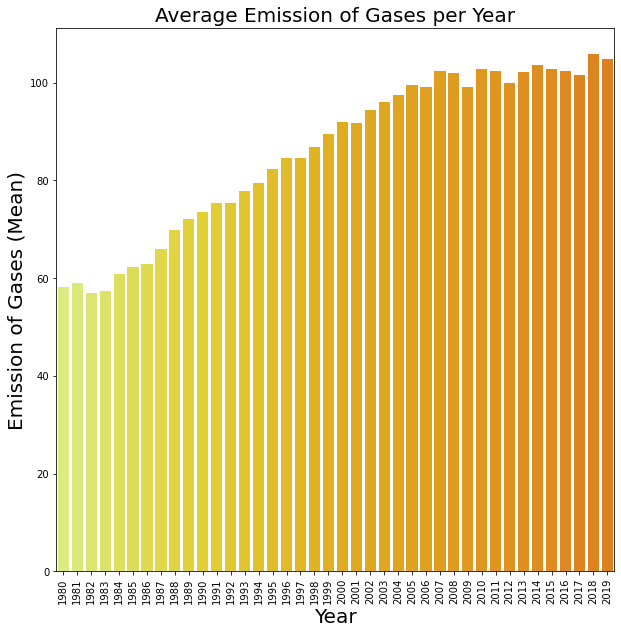

In [5]:
#Plot a bar graph which shows the average emission of gases during the years 1980 through 2019.

df[df["Year"]>=1980].groupby(["Year"])["IPG2211A2N"].mean()

plt.figure(figsize=(10,10))

sns.barplot(x=df[df["Year"]>=1980]["Year"].unique()
            ,y=df[df["Year"]>=1980].groupby(["Year"])["IPG2211A2N"].mean()
            ,palette="Wistia")
            

plt.xlabel("Year",fontsize=20)
plt.ylabel("Emission of Gases (Mean)",fontsize=20)
plt.title("Average Emission of Gases per Year",fontsize=20)
plt.xticks(rotation=90);

Question 2)

With the videogame sales database (videogames.csv):

   1) Which games are in the top 10 in terms of global sales considering the platformas PS3, Wii, X360 and PC?\
   2) Find the proportion (in percentage) of games created for each genre and display the data in:\
   * a) a Dataframe;
   * b) a bar chart;
   * c) a pie chart.
   
   
   3) A line chart with the amount of sales, in average, per year, considering the platforms PS3, Wii, X360 and PSP.
   


In [19]:
#1) Which games are in the top 10 in terms of global sales considering the platformas PS3, Wii, X360 and PC?

df=pd.read_csv("videogame.csv")

df_plataformas=df[df["Platform"].apply(lambda x: True if x in ["PS3","Wii","X360","PSP"] else False)]

display(df_plataformas.sort_values("Global_Sales",ascending=False).head(10))

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38


Action          19.978311
Sports          14.134233
Misc            10.477166
Role-Playing     8.964936
Shooter          7.892517
Adventure        7.747921
Racing           7.525003
Platform         5.337993
Simulation       5.223521
Fighting         5.109049
Strategy         4.102904
Puzzle           3.506447
Name: Genre, dtype: float64

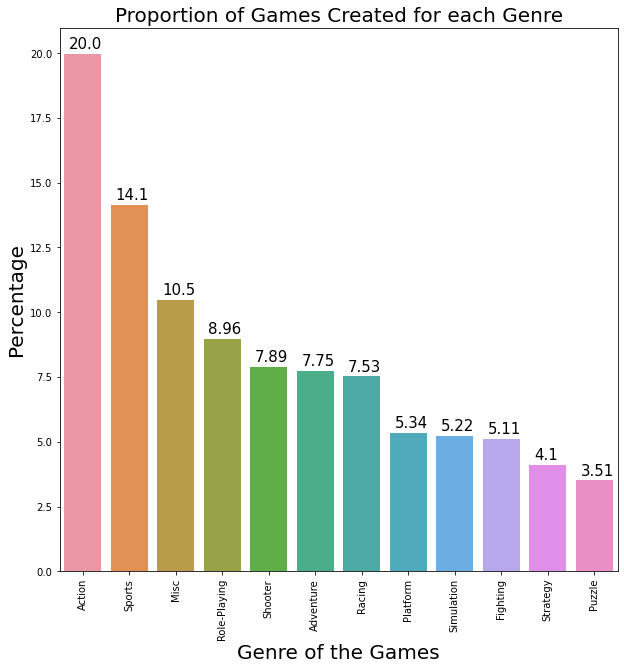

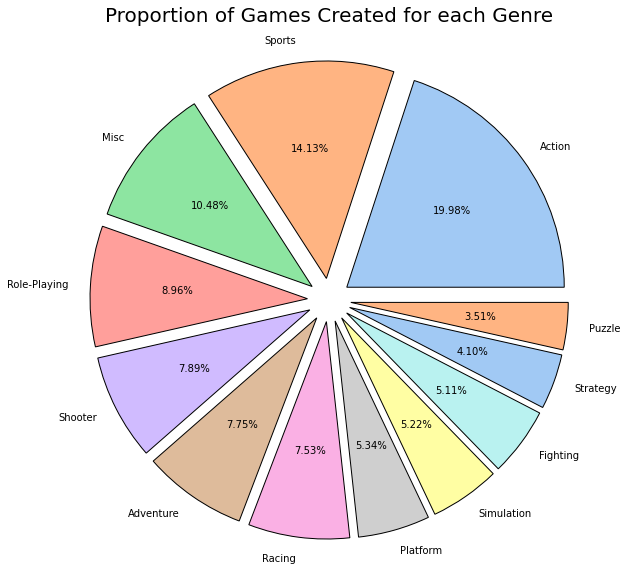

In [35]:
#Item 2)Find the proportion (in percentage) of games created for each genre and display the data in:
   #* a) a Dataframe;
   #* b) a bar chart;
   #* c) a pie chart.

#DataFrame:

display(df["Genre"].value_counts(normalize=True)*100)

#Bar Chart:
x=table.index
y=table

table=df["Genre"].value_counts(normalize=True)*100
plt.figure(figsize=(10,10))
sns.barplot(x=x,y=y)
plt.xlabel("Genre of the Games",fontsize=20)
plt.ylabel("Percentage",fontsize=20)
plt.title("Proportion of Games Created for each Genre",fontsize=20)
plt.xticks(rotation=90)

label=y
for i in range(len(x)):
    plt.text(x = i-0.3 , y = y[i]+0.2, s = f"{label[i]:.3}", size = 15)


plt.show()

#Pie Chart:

colors = sns.color_palette('pastel')
plt.figure(figsize=(10,10))
plt.pie(table,labels=table.index,autopct='%.2f%%',colors=colors,wedgeprops={'edgecolor': 'black'},explode=[0.1]*12,shadow=True)
plt.title("Proportion of Games Created for each Genre",fontsize=20);

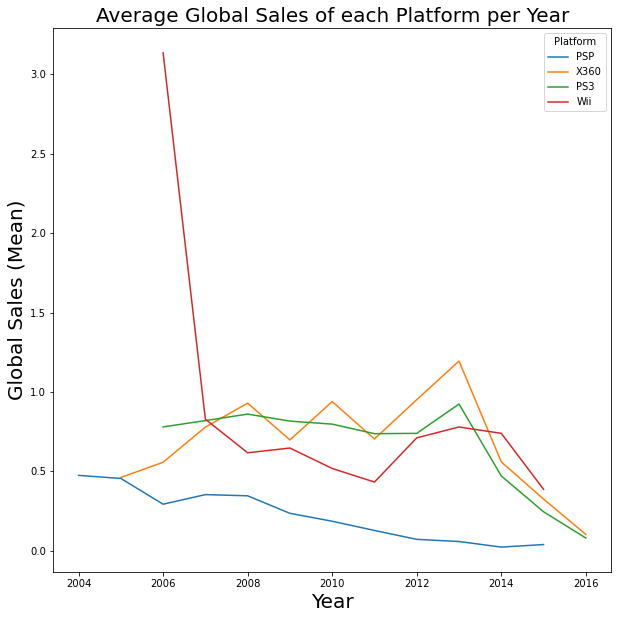

In [8]:
#Item 3) A line chart with the amount of sales, in average, 
#per year, considering the platforms PS3, Wii, X360 and PSP.

df_platforms3=df[df["Platform"].apply(lambda x: True if x in ["PS3","Wii","X360","PSP"] else False)]

df_item3=df_platforms3.groupby(["Year","Platform"])["Global_Sales"].mean().reset_index()

plt.figure(figsize=(10,10))

sns.lineplot(x=df_item3["Year"],y=df_item3["Global_Sales"],hue=df_item3["Platform"])

plt.xlabel("Year",fontsize=20)
plt.ylabel("Global Sales (Mean)",fontsize=20)
plt.title("Average Global Sales of each Platform per Year",fontsize=20);

Question 3)

Considering the dataset fish.csv, explore the data and create:

    1) Several charts (in one figure) combining each pair of features of the fishes and setting a different color   for each species.
    2) Plot a distribution chart of the width of the fishes. Include the KDE.
    3) Create a heat map showing the correlation between each feature of the fishes. Annotate the data on the chart
    and use cmap=coolwarm.
    


In [9]:
df=pd.read_csv("fish.csv")   

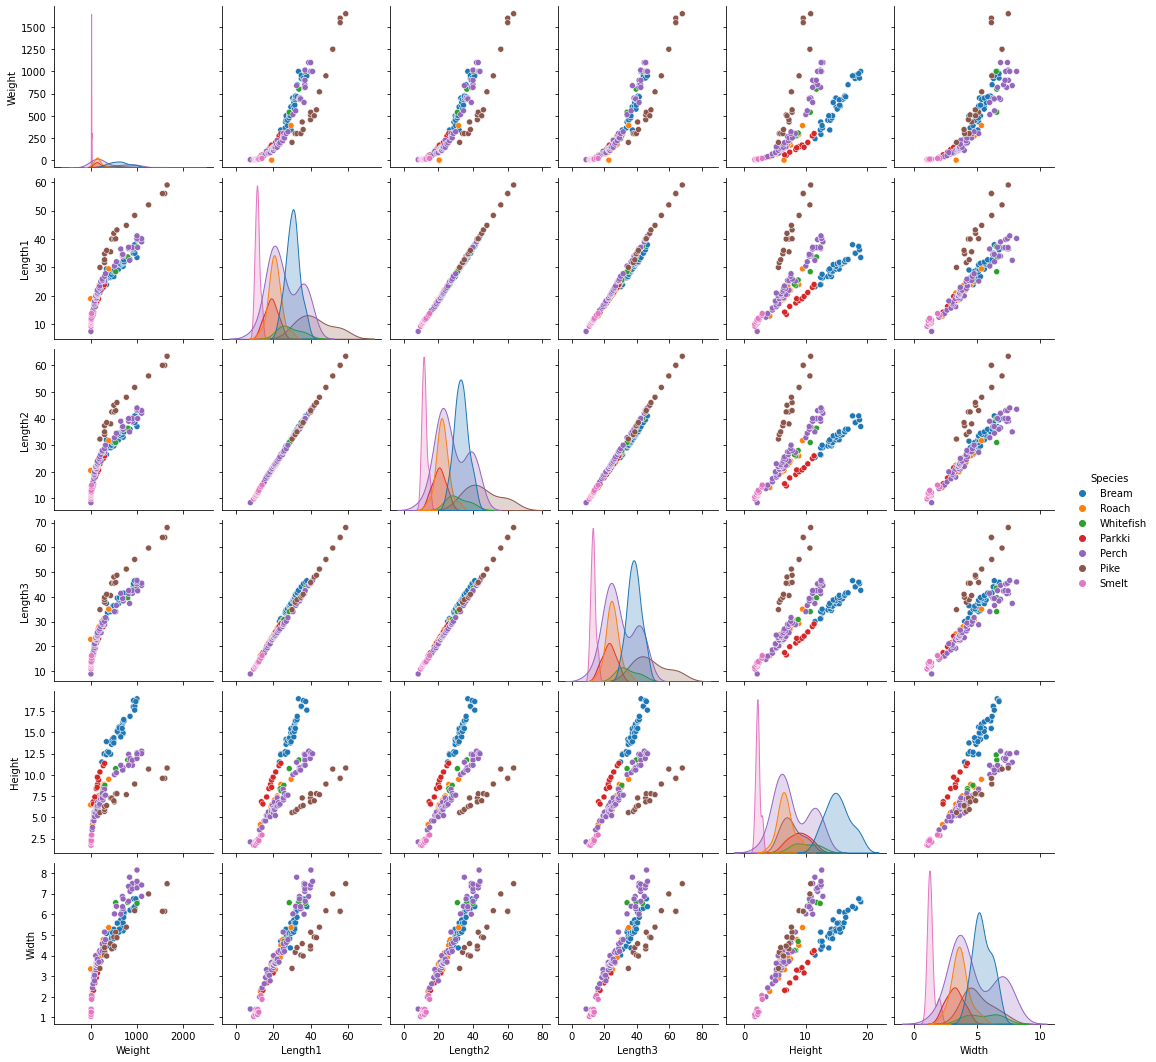

In [10]:
#Item 1) Several charts (in one figure) 
#combining each pair of features of the 
#fishes and setting a different color for each species.

sns.pairplot(df,hue="Species");

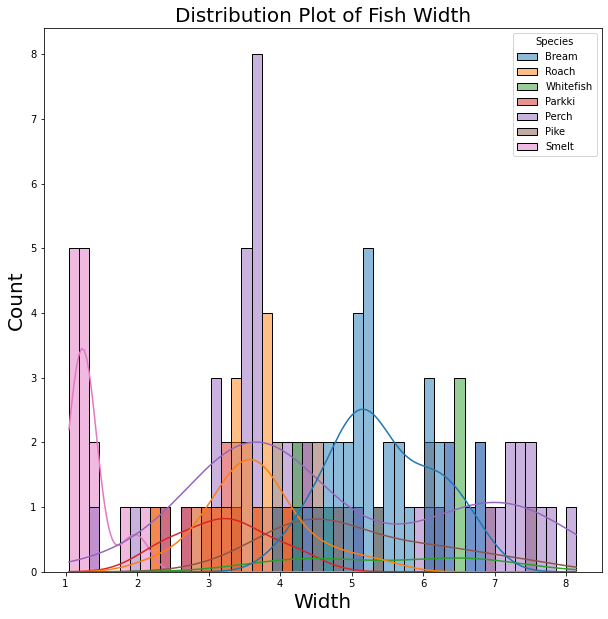

In [11]:
#Item 2) Plot a distribution chart of the width of the fishes. Include the KDE.

plt.figure(figsize=(10,10))
sns.histplot(data=df,x="Width",hue="Species",bins=50,kde=True)
plt.xlabel("Width",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.title("Distribution Plot of Fish Width",fontsize=20)
plt.show()

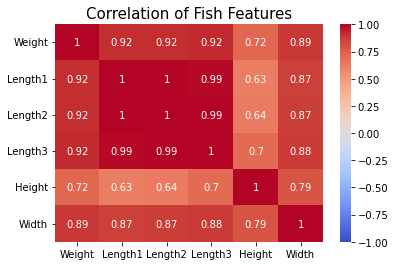

In [12]:
#Item 3) Create a heat map showing the correlation between each feature of the fishes. 
# Annotate the data on the chart and use cmap=coolwarm.

plt.title("Correlation of Fish Features",fontsize=15)

sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm");

4) Using the dataset salarios.csv, explore the differences between salaries of men and women who work in a same
position. For example, Female Managers and Male Managers.


In [13]:
df=pd.read_csv("salarios.csv",sep=";")

In [14]:
display(df.columns)

Index(['year', 'females', 'femalesmanagers', 'femaleprofessionals',
       'femaletechniciansandtradesworkers',
       'femalecommunityandpersonalserviceworkers',
       'femaleclericalandadministrativeworkers', 'femalesalesworkers',
       'femalemachineryoperatorsanddrivers', 'femalelabourers', 'males',
       'malemanagers', 'maleprofessionals', 'maletechniciansandtradesworkers',
       'malecommunityandpersonalserviceworkers',
       'maleclericalandadministrativeworkers', 'malesalesworkers',
       'malemachineryoperatorsanddrivers', 'malelabourers', 'persons',
       'personmanagers', 'personprofessionals',
       'persontechniciansandtradesworkers',
       'personcommunityandpersonalserviceworkers',
       'personclericalandadministrativeworkers', 'personsalesworkers',
       'personmachineryoperatorsanddrivers', 'personlabourers'],
      dtype='object')

In [15]:
for i in range(2,10):
    column1=df.columns[i]
    column2=df.columns[i+9]
    column_name=column2.replace("male","")
    df[f"{column_name}"]=(df[column2]-df[column1])
    mean=df[f"{column_name}"].mean()
    print(f"The difference between the salaries of {column2} and {column1} is, in average:\n")
    print(mean)
df_differences=df.iloc[:,[0]+list(range(28,36))].set_index("year")
df_differences.loc["Mean"]= df_differences.mean()
display(df_differences)

#Observations:
#1) The biggest difference is between male and female managers
# while the smallest difference is between male and female laboureres.
#2) In the column which represents the difference between the salaries of
#male and female machinery operators and drivers, we see the only negative values,
#which means women are receiving a better salary.


The difference between the salaries of malemanagers and femalesmanagers is, in average:

6.554285714285716
The difference between the salaries of maleprofessionals and femaleprofessionals is, in average:

5.961428571428572
The difference between the salaries of maletechniciansandtradesworkers and femaletechniciansandtradesworkers is, in average:

5.054285714285714
The difference between the salaries of malecommunityandpersonalserviceworkers and femalecommunityandpersonalserviceworkers is, in average:

5.099285714285714
The difference between the salaries of maleclericalandadministrativeworkers and femaleclericalandadministrativeworkers is, in average:

4.660714285714286
The difference between the salaries of malesalesworkers and femalesalesworkers is, in average:

3.9792857142857136
The difference between the salaries of malemachineryoperatorsanddrivers and femalemachineryoperatorsanddrivers is, in average:

2.9442857142857144
The difference between the salaries of malelabourers and fe

,managers,professionals,techniciansandtradesworkers,communityandpersonalserviceworkers,clericalandadministrativeworkers,salesworkers,machineryoperatorsanddrivers,labourers
year,,,,,,,,
2004,6.880000,5.010000,4.250000,3.170000,3.210000,3.720000,4.650000,0.730000
2005,5.030000,4.200000,3.010000,4.320000,2.990000,3.620000,-0.450000,1.140000
2006,6.560000,3.780000,3.000000,3.900000,4.420000,3.800000,3.990000,1.860000
2007,2.420000,6.920000,2.990000,4.710000,5.250000,4.040000,5.020000,2.140000
2008,5.660000,6.470000,4.510000,10.380000,4.370000,5.140000,3.430000,2.520000
2009,8.370000,5.400000,6.430000,4.100000,4.440000,3.580000,3.980000,2.060000
2010,6.870000,5.970000,5.090000,5.020000,4.950000,4.070000,4.510000,2.510000
2011,8.650000,9.300000,6.070000,3.160000,5.920000,4.120000,4.240000,2.340000
2012,8.000000,7.520000,6.990000,5.510000,4.550000,3.670000,4.420000,3.190000


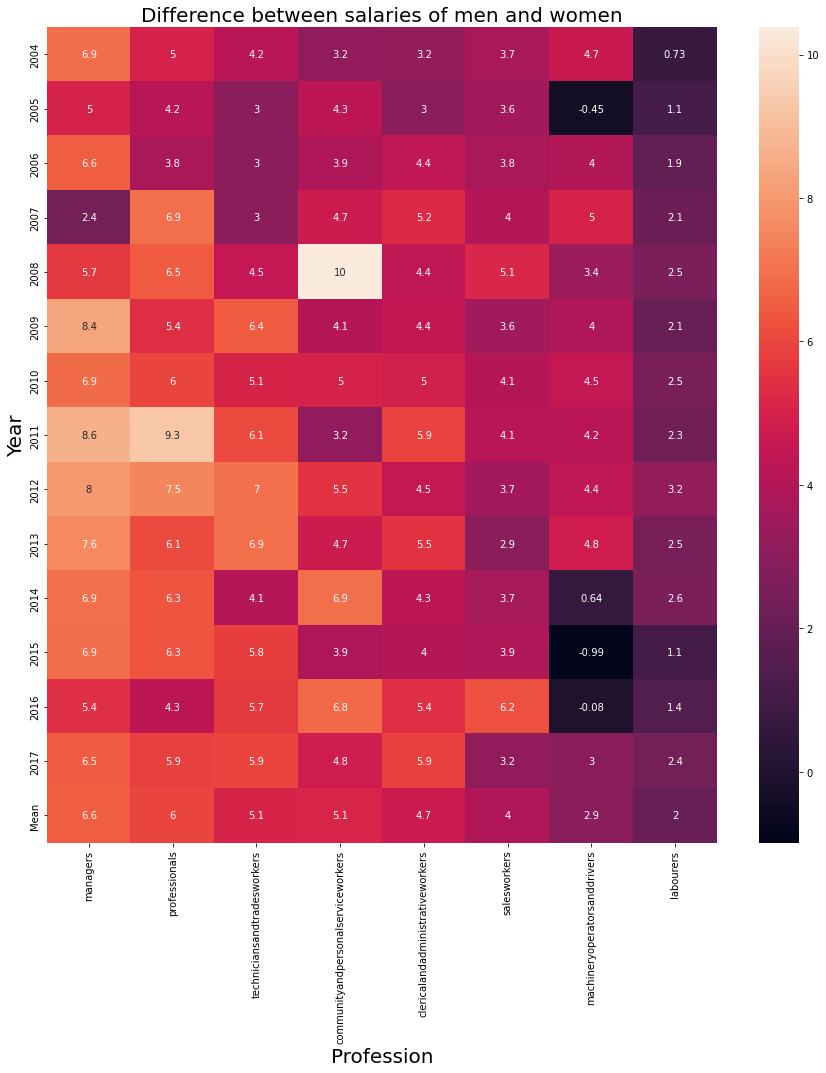

In [16]:
plt.figure(figsize=(15,15))
plt.title("Difference between salaries of men and women",fontsize=20)
sns.heatmap(df_differences,annot=True)
plt.ylabel("Year",fontsize=20)
plt.xlabel("Profession",fontsize=20)
plt.show()